In [1]:
!pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv('/Users/syedamishrasaiara/pythonprojects/tweets_2024.csv')  # Replace with actual file path
df.head()
#print(df.head())  # Display first few rows

/var/folders/pw/pv_ywjx56q70gx265dkhp_080000gn/T/ipykernel_56686/2591053411.py:1: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/syedamishrasaiara/pythonprojects/tweets_2024.csv')  # Replace with actual file path


,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,in_reply_to_user_id,username,name,location,keyword,entities.mentions,attachments.poll_ids,attachments.media_source_tweet_id,entities.cashtags,withheld.country_codes
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.756859e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.756859e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,jerkinjerky,Spencer's Jerkin' Jerky,"Gainesville, FL",max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.756851e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.756851e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,GiveMeMyRemote,GiveMeMyRemote,Wherever the TV news is.,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.756828e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.756850e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,14541151.0,marisaroffman,Marisa Roffman,NaN,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.756849e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.756849e+18,NaN,...,NaN,geekmentality,Geek Mentality Mike,Massachusetts,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.756861e+18,['1756861000693739724'],False,everyone,en,1.747784e+18,1.756861e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,ryanadamtexas,Ryan Adam Texas,"Dallas, Texas USA",ultra beer,"[{'start': 2, 'end': 6, 'username': 'NFL', 'id...",NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171454 entries, 0 to 171453
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         171454 non-null  object 
 1   text                               171454 non-null  object 
 2   conversation_id                    171454 non-null  float64
 3   edit_history_tweet_ids             171454 non-null  object 
 4   possibly_sensitive                 171454 non-null  bool   
 5   reply_settings                     171454 non-null  object 
 6   lang                               171454 non-null  object 
 7   author_id                          171454 non-null  float64
 8   id                                 171454 non-null  float64
 9   entities.urls                      81596 non-null   object 
 10  entities.annotations               156299 non-null  object 
 11  edit_controls.edits_remaining      1714

In [6]:
df.isna().sum()

created_at                                0
text                                      0
conversation_id                           0
edit_history_tweet_ids                    0
possibly_sensitive                        0
reply_settings                            0
lang                                      0
author_id                                 0
id                                        0
entities.urls                         89858
entities.annotations                  15155
edit_controls.edits_remaining             0
edit_controls.is_edit_eligible            0
edit_controls.editable_until              0
geo.place_id                         168863
attachments.media_keys               103630
public_metrics.retweet_count              0
public_metrics.reply_count                0
public_metrics.like_count                 0
public_metrics.quote_count                0
public_metrics.bookmark_count             0
public_metrics.impression_count           0
entities.hashtags               

In [7]:
df.describe()

,conversation_id,author_id,id,edit_controls.edits_remaining,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,in_reply_to_user_id
count,1.714540e+05,1.714540e+05,1.714540e+05,171454.000000,171454.000000,171454.000000,171454.000000,171454.000000,171454.000000,1.714540e+05,1.603500e+04
mean,1.755538e+18,9.703622e+17,1.756857e+18,4.997235,1358.228189,0.217522,3.934706,0.061276,0.169946,4.706514e+02,5.848198e+17
std,1.052831e+16,7.284197e+17,1.970266e+13,0.065727,4011.506930,5.247876,157.692866,4.490009,5.547671,9.403417e+03,7.305571e+17
min,1.097983e+18,1.483000e+03,1.756825e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.840000e+03
25%,1.756840e+18,1.396287e+09,1.756841e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.949206e+08
50%,1.756855e+18,1.257890e+18,1.756856e+18,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.028651e+08
75%,1.756878e+18,1.647345e+18,1.756879e+18,5.000000,339.000000,0.000000,0.000000,0.000000,0.000000,9.800000e+01,1.464852e+18
max,1.756888e+18,1.756885e+18,1.756888e+18,5.000000,66914.000000,957.000000,28554.000000,1719.000000,1062.000000,2.300994e+06,1.756813e+18


In [8]:
twitter_data = df

In [9]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171454 entries, 0 to 171453
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         171454 non-null  object 
 1   text                               171454 non-null  object 
 2   conversation_id                    171454 non-null  float64
 3   edit_history_tweet_ids             171454 non-null  object 
 4   possibly_sensitive                 171454 non-null  bool   
 5   reply_settings                     171454 non-null  object 
 6   lang                               171454 non-null  object 
 7   author_id                          171454 non-null  float64
 8   id                                 171454 non-null  float64
 9   entities.urls                      81596 non-null   object 
 10  entities.annotations               156299 non-null  object 
 11  edit_controls.edits_remaining      1714

In [10]:
twitter_data.head()

,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,in_reply_to_user_id,username,name,location,keyword,entities.mentions,attachments.poll_ids,attachments.media_source_tweet_id,entities.cashtags,withheld.country_codes
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.756859e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.756859e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,jerkinjerky,Spencer's Jerkin' Jerky,"Gainesville, FL",max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.756851e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.756851e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,GiveMeMyRemote,GiveMeMyRemote,Wherever the TV news is.,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.756828e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.756850e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,14541151.0,marisaroffman,Marisa Roffman,NaN,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.756849e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.756849e+18,NaN,...,NaN,geekmentality,Geek Mentality Mike,Massachusetts,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.756861e+18,['1756861000693739724'],False,everyone,en,1.747784e+18,1.756861e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,ryanadamtexas,Ryan Adam Texas,"Dallas, Texas USA",ultra beer,"[{'start': 2, 'end': 6, 'username': 'NFL', 'id...",NaN,NaN,NaN,NaN


In [11]:
twitter_data.isna().sum()

created_at                                0
text                                      0
conversation_id                           0
edit_history_tweet_ids                    0
possibly_sensitive                        0
reply_settings                            0
lang                                      0
author_id                                 0
id                                        0
entities.urls                         89858
entities.annotations                  15155
edit_controls.edits_remaining             0
edit_controls.is_edit_eligible            0
edit_controls.editable_until              0
geo.place_id                         168863
attachments.media_keys               103630
public_metrics.retweet_count              0
public_metrics.reply_count                0
public_metrics.like_count                 0
public_metrics.quote_count                0
public_metrics.bookmark_count             0
public_metrics.impression_count           0
entities.hashtags               

In [12]:
df = df.drop_duplicates()

In [13]:
twitter_data = df
import regex
def extract_hashtags(text):
    hashtags = regex.findall(r'\#\w+', text)
    if hashtags: 
        return hashtags
    else: 
        return ""
    
def extract_emojis(text):
    emoji_pattern = regex.compile("[" 
                                  u"\U0001F600-\U0001F64F"
                                  u"\U0001F300-\U0001F5FF"
                                  u"\U0001F680-\U0001F6FF"
                                  u"\U0001F1E0-\U0001F1FF"
                                  u"\U00002702-\U000027B0"
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=regex.UNICODE)
    emojis = emoji_pattern.findall(text)
    if emojis:
        return emojis
    else:
        return ""
    
def extract_mentions(text):
    mentions = regex.findall(r'\@\w+', text)
    if mentions: 
        return mentions
    else: 
        return ""
    
    
twitter_data['hashtags'] = twitter_data['text'].apply(extract_hashtags)
twitter_data['emojis'] = twitter_data['text'].apply(extract_emojis)
twitter_data['mentions'] = twitter_data['text'].apply(extract_mentions)

twitter_data[['hashtags', 'emojis', 'mentions']].head()

,hashtags,emojis,mentions
0,,,
1,"[#SuperBowl, #GhostsCBS, #FireCountry, #Shogun...",,
2,"[#Tracker, #FireCountry, #SuperBowl]",,
3,"[#FireCountry, #Superbowl]",,
4,"[#superbowl, #fifa, #worldcup, #messi, #cristi...","[👉, 🙌]","[@NFL, @fifa, @Cristiano, @TeamMessi, @Patrick..."


In [14]:
d = twitter_data.head(1000)
data = d.to_csv ("sample.csv", index = False)

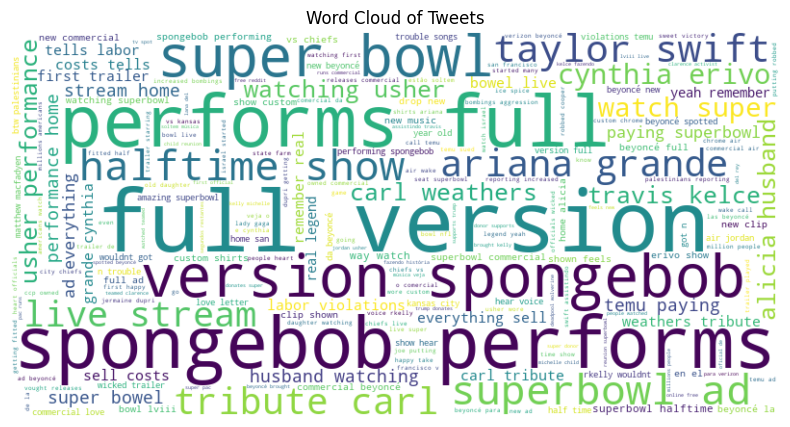

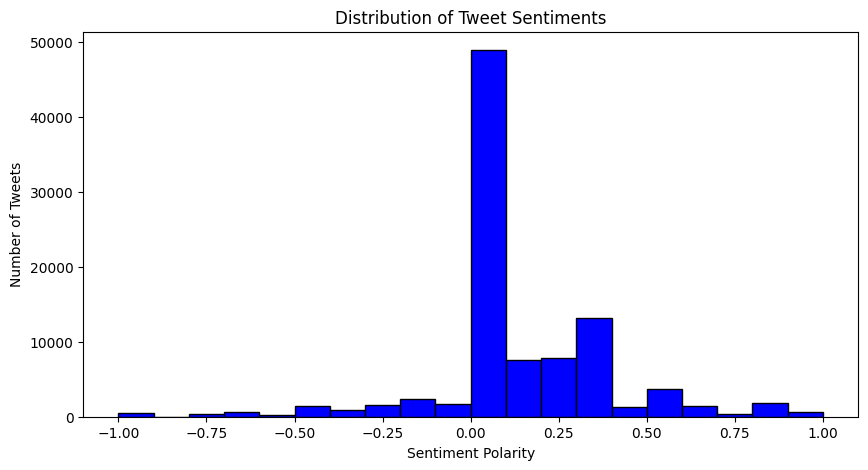

                                                text  \
0   Fireman at the Superbowl https://t.co/AjqmmHvDQl   
1  Watch the #SuperBowl ads for #GhostsCBS, #Fire...   
2  Watch the #Tracker and #FireCountry #SuperBowl...   
3  I can't believe Norman Bates brother is a fire...   
4  👉 @NFL &amp; @fifa may be occut but some of th...   

                                          clean_text  sentiment  
0                           Fireman at the Superbowl       0.00  
1  Watch the #SuperBowl ads for #GhostsCBS, #Fire...       0.50  
2  Watch the #Tracker and #FireCountry #SuperBowl...       0.00  
3  I can't believe Norman Bates brother is a fire...       0.00  
4  👉 @NFL &amp; @fifa may be occut but some of th...       0.25  


In [18]:
def remove_urls(text): 
    return " ".join([word for word in text.split() if 'http' not in word and 'www' not in word])

custom_stopwords =set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "rt", "https", "vol", "written"
])

def clean_and_tokenize(text): 
    return [word.lower() for word in text.split()
            if word.lower() not in custom_stopwords and word.isalpha()]
    
def calculate_sentiment(text): 
    return TextBlob(text).sentiment.polarity

twitter_data = twitter_data.dropna(subset = ['text'])
twitter_data['clean_text'] = twitter_data['text'].apply(remove_urls)
twitter_data['tokens'] = twitter_data['clean_text'].apply(clean_and_tokenize)
twitter_data['sentiment'] = twitter_data['clean_text'].apply(calculate_sentiment)

all_words = ' '.join([word for tokens in twitter_data['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(twitter_data['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')
plt.show()

print(twitter_data[['text', 'clean_text', 'sentiment']].head())

Text(0, 0.5, 'Number of tweets')

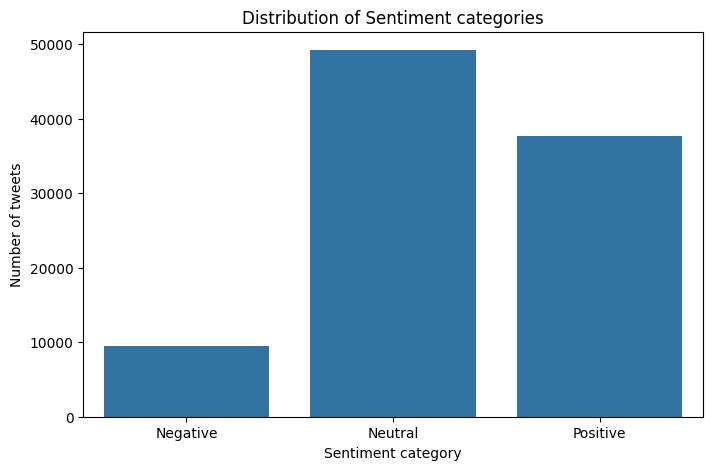

In [19]:
def categorize_sentiment(score):
    if score < 0: 
        return 'Negative'
    elif score > 0.12: 
        return 'Positive'
    else: 
        return 'Neutral'
    
    
twitter_data['sentiment_category'] = twitter_data['sentiment'].apply(categorize_sentiment)

reach_analysis = twitter_data['keyword'].value_counts().head(15)

engagement_analysis = twitter_data['sentiment_category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_analysis.index, y=engagement_analysis.values, order=['Negative', 'Neutral', 'Positive'])
plt.title('Distribution of Sentiment categories')
plt.xlabel('Sentiment category')
plt.ylabel('Number of tweets')

In [22]:
twitter_data['sentiment_category'] = twitter_data['sentiment_category'].astype('category')

most_frequent_category = twitter_data['sentiment_category'].value_counts().index[0]
twitter_data['sentiment_category'].fillna(most_frequent_category, inplace= True)

/var/folders/pw/pv_ywjx56q70gx265dkhp_080000gn/T/ipykernel_56686/3443089989.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_data['sentiment_category'].fillna(most_frequent_category, inplace= True)


In [23]:
twitter_data.isna().sum()

created_at                               0
text                                     0
conversation_id                          0
edit_history_tweet_ids                   0
possibly_sensitive                       0
reply_settings                           0
lang                                     0
author_id                                0
id                                       0
entities.urls                        51406
entities.annotations                  8888
edit_controls.edits_remaining            0
edit_controls.is_edit_eligible           0
edit_controls.editable_until             0
geo.place_id                         95117
attachments.media_keys               56041
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.bookmark_count            0
public_metrics.impression_count          0
entities.hashtags                    24875
referenced_

In [24]:
twitter_data['has_mentions'] = twitter_data['mentions'].apply(lambda x: len(x) > 0)

tweets_with_mentions_count = twitter_data['has_mentions'].sum()
tweets_without_mentions_count = len(twitter_data) - tweets_with_mentions_count

tweets_with_mentions_count, tweets_without_mentions_count

(np.int64(75606), np.int64(20801))

In [25]:
twitter_data.head()

,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,entities.cashtags,withheld.country_codes,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.756859e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.756859e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,NaN,,,,Fireman at the Superbowl,"[fireman, superbowl]",0.00,<bound method NDFrame.astype of 0 Neu...,False
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.756851e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.756851e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,NaN,"[#SuperBowl, #GhostsCBS, #FireCountry, #Shogun...",,,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...","[watch, ads]",0.50,<bound method NDFrame.astype of 0 Neu...,False
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.756828e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.756850e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,NaN,NaN,"[#Tracker, #FireCountry, #SuperBowl]",,,Watch the #Tracker and #FireCountry #SuperBowl...,"[watch, ads, cbs]",0.00,<bound method NDFrame.astype of 0 Neu...,False
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.756849e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.756849e+18,NaN,...,NaN,NaN,"[#FireCountry, #Superbowl]",,,I can't believe Norman Bates brother is a fire...,"[believe, norman, bates, brother, fire, fighter]",0.00,<bound method NDFrame.astype of 0 Neu...,False
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.756861e+18,['1756861000693739724'],False,everyone,en,1.747784e+18,1.756861e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,NaN,"[#superbowl, #fifa, #worldcup, #messi, #cristi...","[👉, 🙌]","[@NFL, @fifa, @Cristiano, @TeamMessi, @Patrick...",👉 @NFL &amp; @fifa may be occut but some of th...,"[may, occut, athletes, believers, first]",0.25,<bound method NDFrame.astype of 0 Neu...,True


In [26]:
twitter_data.isna().sum()

created_at                               0
text                                     0
conversation_id                          0
edit_history_tweet_ids                   0
possibly_sensitive                       0
reply_settings                           0
lang                                     0
author_id                                0
id                                       0
entities.urls                        51406
entities.annotations                  8888
edit_controls.edits_remaining            0
edit_controls.is_edit_eligible           0
edit_controls.editable_until             0
geo.place_id                         95117
attachments.media_keys               56041
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.bookmark_count            0
public_metrics.impression_count          0
entities.hashtags                    24875
referenced_

In [27]:
twitter_data.to_csv('First_clean_data.csv', index = False)

In [31]:
data = pd.read_csv('First_clean_data.csv')

In [33]:
from collections import Counter

/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127944 (\N{AMERICAN FOOTBALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127357 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/si

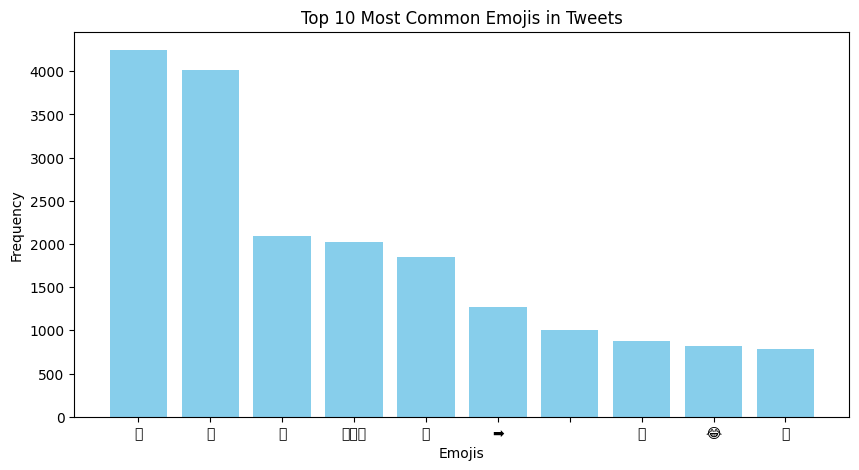

In [34]:
#Since we need to use the 'keyword' column instead of 'clean_text', lets adjust our approach
import ast
#we'll extract the 'keyword' and 'emojis' columns where emojis are not NaN
emojis_data = data [['keyword', 'emojis']].dropna(subset=['emojis'])

#Convert the 'emojis' column from string representation of lists to actual lists 
emojis_data['emojis'] = emojis_data['emojis'].apply(ast.literal_eval)

#initialize an empty dictionary to store emoji counts for each keyword
emojis_counts_by_keywords = {}

#Iterate over the rows in the dataframe that contain emojis   
for _, row in emojis_data.iterrows(): 
    keyword = row['keyword']
    emoji_list = row['emojis']

    # If the keyword is not in the dictionary, initialize an empty Counter
    if keyword not in emojis_counts_by_keywords:
        emojis_counts_by_keywords[keyword] = Counter()

    # Update the count of each emoji for this keyword
    emojis_counts_by_keywords[keyword].update(emoji_list)
    
# Flatten the emoji counts across all keywords
all_emoji_counts = Counter()
for emoji_counter in emojis_counts_by_keywords.values():
    all_emoji_counts.update(emoji_counter)
    
    
# Get the top 10 most common emojis
top_emojis = all_emoji_counts.most_common(10)

# Extract data for visualization
emoji_labels, emoji_counts = zip(*top_emojis)

# Plot a bar chart of the most common emojis
plt.figure(figsize=(10, 5))
plt.bar(emoji_labels, emoji_counts, color='skyblue')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Emojis in Tweets')
plt.show()

In [ ]:
data['most_common_emoji'] = data['emojis'].astype('category')

most_frequent_category = data['most_common_emoji'].value_counts().index[0]
data['most_common_emoji'].fillna(most_frequent_category, inplace= True)

/var/folders/pw/pv_ywjx56q70gx265dkhp_080000gn/T/ipykernel_56686/555588160.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['most_common_emoji'].fillna(most_frequent_category, inplace= True)


In [39]:
data.isna().sum()

created_at                               0
text                                     0
conversation_id                          0
edit_history_tweet_ids                   0
possibly_sensitive                       0
reply_settings                           0
lang                                     0
author_id                                0
id                                       0
entities.urls                        51406
entities.annotations                  8888
edit_controls.edits_remaining            0
edit_controls.is_edit_eligible           0
edit_controls.editable_until             0
geo.place_id                         95117
attachments.media_keys               56041
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.bookmark_count            0
public_metrics.impression_count          0
entities.hashtags                    24875
referenced_

In [40]:
data.head()

,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,withheld.country_codes,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,most_common_emoji
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.756859e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.756859e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,NaN,NaN,NaN,Fireman at the Superbowl,"['fireman', 'superbowl']",0.00,<bound method NDFrame.astype of 0 Neu...,False,['🚨']
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.756851e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.756851e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,"['#SuperBowl', '#GhostsCBS', '#FireCountry', '...",NaN,NaN,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...","['watch', 'ads']",0.50,<bound method NDFrame.astype of 0 Neu...,False,['🚨']
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.756828e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.756850e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,NaN,"['#Tracker', '#FireCountry', '#SuperBowl']",NaN,NaN,Watch the #Tracker and #FireCountry #SuperBowl...,"['watch', 'ads', 'cbs']",0.00,<bound method NDFrame.astype of 0 Neu...,False,['🚨']
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.756849e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.756849e+18,NaN,...,NaN,"['#FireCountry', '#Superbowl']",NaN,NaN,I can't believe Norman Bates brother is a fire...,"['believe', 'norman', 'bates', 'brother', 'fir...",0.00,<bound method NDFrame.astype of 0 Neu...,False,['🚨']
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.756861e+18,['1756861000693739724'],False,everyone,en,1.747784e+18,1.756861e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,"['#superbowl', '#fifa', '#worldcup', '#messi',...","['👉', '🙌']","['@NFL', '@fifa', '@Cristiano', '@TeamMessi', ...",👉 @NFL &amp; @fifa may be occut but some of th...,"['may', 'occut', 'athletes', 'believers', 'fir...",0.25,<bound method NDFrame.astype of 0 Neu...,True,"['👉', '🙌']"


In [41]:
data.to_csv('Withemoji_clean_data.csv', index = False)

In [ ]:
df.to_csv('processed_tweets.csv', index=False)